In [1]:
import ee
import geemap

In [2]:
try:
  ee.Initialize()
  print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
  print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


In [3]:
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11'])

aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

img = geemap.ee_to_numpy(img, region=aoi)
print(img.shape)

(373, 531, 9)


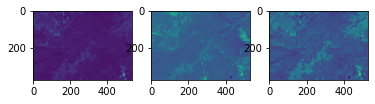

In [4]:
import matplotlib.pyplot as plt

bands = (4,5,6)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(img[:,:,bands[0]-1])
axarr[1].imshow(img[:,:,bands[1]-1])
axarr[2].imshow(img[:,:,bands[2]-1])


In [5]:
import numpy as np

def stack_rgb(img,bands):
    
    red = img[:,:,bands[0]-1]
    green = img[:,:,bands[1]-1]
    blue = img[:,:,bands[2]-1]
    
    stackedRGB = np.stack((red,green,blue),axis=2)
    
    return stackedRGB


img_rgb = stack_rgb(img,bands)
img_rgb.shape

(373, 531, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


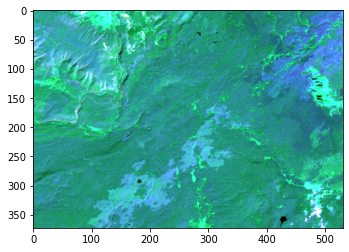

In [6]:
def MyNormalize(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_n = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
        img_n[:,:,i] = sigma*one_band
    return img_n

plt.imshow(MyNormalize(img_rgb,2))

In [7]:
nr,nc,nb = img.shape
X = img.reshape((nr*nc, nb))
X.shape

(198063, 9)

In [8]:
nr,nc,nb = img.shape
X = img.reshape((nr*nc, nb))
X.shape

(198063, 9)

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_pca.shape

(198063, 3)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_pca)

img_pca = X_pca.reshape((nr,nc,3))
img_pca.shape

(373, 531, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(373, 531, 3)


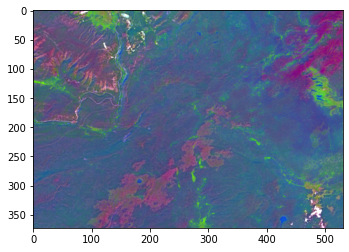

In [11]:
img_pca = X_pca.reshape((nr,nc,3))
print(img_pca.shape)

#Pseudocolor image extracted through PCA analysis
plt.imshow(MyNormalize(img_pca,2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

from sklearn import cluster
clus_model = cluster.KMeans(n_clusters=5)
clus_model.fit(X)

KMeans(n_clusters=5)

In [13]:
lab = clus_model.labels_
lab.shape
class_map = lab.reshape((nr,nc,1))
class_map.shape

(373, 531, 1)

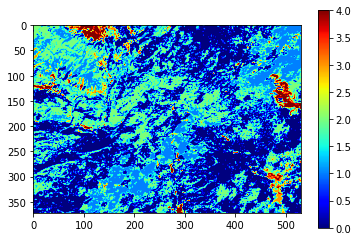

In [14]:
plt.imshow(class_map, cmap='jet')
plt.colorbar()